In [663]:
 from scipy.io import arff
import pandas as pd
import numpy as np

data, meta = arff.loadarff('ThoraricSurgery.arff')

In [664]:
df = pd.DataFrame(data)


In [665]:
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


In [666]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    float64
 16  Risk1Yr  470 non-null    object 
dtypes: float64(3), object(14)
memory usage: 62.5+ KB
None


In [667]:
df['FVC_num'] = df['PRE4']
df['FEV1_num'] = df['PRE5']
df['Zubrod_perf_cat'] = df['PRE6']
df['Pain_bin'] = df['PRE7'].map({b'T': 1, b'F': 0})
df['Haemoptysis_bin'] = df['PRE8'].map({b'T': 1, b'F': 0})
df['Dyspnoea_bin'] = df['PRE9'].map({b'T': 1, b'F': 0})
df['Cough_bin'] = df['PRE10'].map({b'T': 1, b'F': 0})
df['Weakness_bin'] = df['PRE11'].map({b'T': 1, b'F': 0})
df['Tumor_cat'] = df['PRE14']
df['T2DM_bin'] = df['PRE17'].map({b'T': 1, b'F': 0})
df['MI_bin'] = df['PRE19'].map({b'T': 1, b'F': 0})
df['PAD_bin'] = df['PRE19'].map({b'T': 1, b'F': 0})
df['Smoking_bin'] = df['PRE19'].map({b'T': 1, b'F': 0})
df['Asthma_bin'] = df['PRE19'].map({b'T': 1, b'F': 0})
df['mortality_label'] = df['Risk1Yr'].map({b'T': 1, b'F': 0})

cols_to_drop = [
    'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10',
    'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr'
]

df = df.drop(columns=cols_to_drop)

df.head()

,DGN,AGE,FVC_num,FEV1_num,Zubrod_perf_cat,Pain_bin,Haemoptysis_bin,Dyspnoea_bin,Cough_bin,Weakness_bin,Tumor_cat,T2DM_bin,MI_bin,PAD_bin,Smoking_bin,Asthma_bin,mortality_label
0,b'DGN2',60.0,2.88,2.16,b'PRZ1',0,0,0,1,1,b'OC14',0,0,0,0,0,0
1,b'DGN3',51.0,3.40,1.88,b'PRZ0',0,0,0,0,0,b'OC12',0,0,0,0,0,0
2,b'DGN3',59.0,2.76,2.08,b'PRZ1',0,0,0,1,0,b'OC11',0,0,0,0,0,0
3,b'DGN3',54.0,3.68,3.04,b'PRZ0',0,0,0,0,0,b'OC11',0,0,0,0,0,0
4,b'DGN3',73.0,2.44,0.96,b'PRZ2',0,1,0,1,1,b'OC11',0,0,0,0,0,1


In [668]:
print(sorted(df['DGN'].unique()))

print(sorted(df['Zubrod_perf_cat'].unique()))

print(sorted(df['Tumor_cat'].unique()))

for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, bytes)).any():
        df[col] = df[col].str.decode('utf-8')

print(sorted(df['DGN'].unique()))

print(sorted(df['Zubrod_perf_cat'].unique()))

print(sorted(df['Tumor_cat'].unique()))       

[b'DGN1', b'DGN2', b'DGN3', b'DGN4', b'DGN5', b'DGN6', b'DGN8']
[b'PRZ0', b'PRZ1', b'PRZ2']
[b'OC11', b'OC12', b'OC13', b'OC14']
['DGN1', 'DGN2', 'DGN3', 'DGN4', 'DGN5', 'DGN6', 'DGN8']
['PRZ0', 'PRZ1', 'PRZ2']
['OC11', 'OC12', 'OC13', 'OC14']


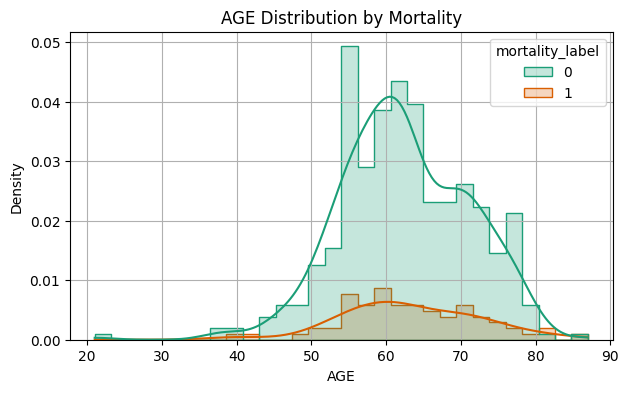

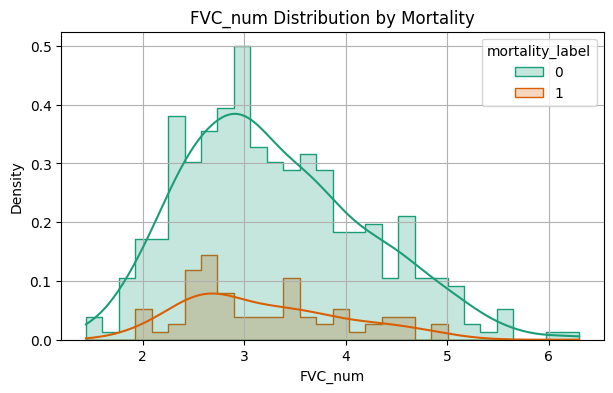

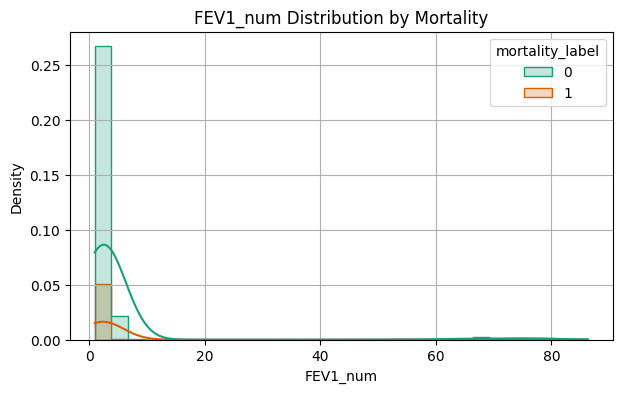

In [669]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['AGE', 'FVC_num', 'FEV1_num']

for feature in features:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=feature, hue='mortality_label', kde=True, bins=30, palette='Dark2', element='step', stat='density')
    plt.title(f'{feature} Distribution by Mortality')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

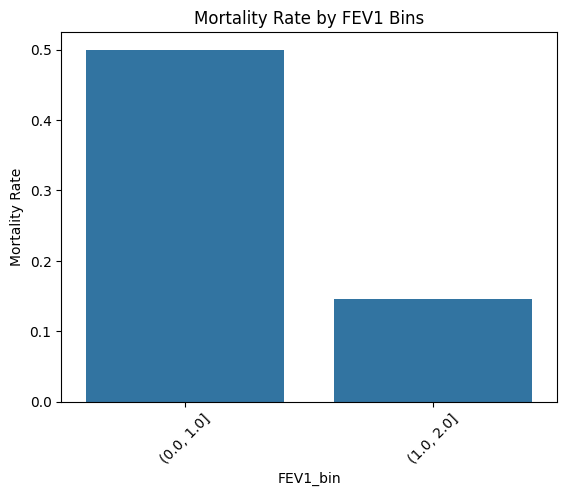

In [670]:
#Exploring binning of continuous variables 
#Experimentation showed more granular cutoffs don't matter more than <1 and >1 
df['FEV1_bin'] = pd.cut(df['FEV1_num'], bins=[ 0, 1.0, 2.0])
mortality_rate = df.groupby('FEV1_bin')['mortality_label'].mean().reset_index()

sns.barplot(data=mortality_rate, x='FEV1_bin', y='mortality_label')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by FEV1 Bins')
plt.xticks(rotation=45)
plt.show()

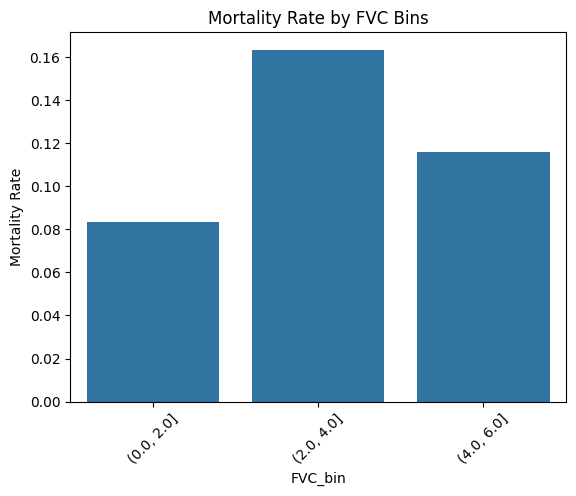

In [671]:
#Exploring binning of continuous variables 
#Experimentation showed more granular cutoffs don't matter more than <1 and >1 
df['FVC_bin'] = pd.cut(df['FVC_num'], bins=[ 0,2.0, 4.0, 6.0])
mortality_rate = df.groupby('FVC_bin')['mortality_label'].mean().reset_index()

sns.barplot(data=mortality_rate, x='FVC_bin', y='mortality_label')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by FVC Bins')
plt.xticks(rotation=45)
plt.show()

In [672]:
#Exploring binning of continuous variables 
#Experimentation showed more granular cutoffs don't matter more than <1 and >1 

#print(df['AGE'].describe())

#df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

#bins=[ 0, 20, 40, 50, 55, 60, 65, 70, 75, 80, 85]

#df['AGE_bin'] = pd.cut(df['AGE'], bins=bins, include_lowest=True)

#mortality_rate = df.groupby('AGE_bin')['mortality_label'].mean().reset_index()

#sns.barplot(data=mortality_rate, x='AGE_bin', y='mortality_label')
#plt.ylabel('Mortality Rate')
#plt.title('Mortality Rate by AGE Bins')
#plt.xticks(rotation=45)
#plt.show()

In [673]:
#These experimental bins were intended to reduce noise; didn't improve model for logistic regression
#df['cough_pain_bin'] = df[['Cough_bin', 'Pain_bin']].any(axis=1).astype(int)

#df['Dysp_weak_bin'] = df[['Dyspnoea_bin', 'Weakness_bin']].any(axis=1).astype(int)

#Adding replacement for continuous variable FEV1

df['FEV1_low_bin'] = (df['FEV1_num'] < 1).astype(int)

#mortality spikes at age 80 
df['AGE_binary'] = (df['AGE'] > 80).astype(int)

#Make FVC bins one-hot encoded for model friendliness
fvc_dummies = pd.get_dummies(df['FVC_bin'], prefix='FVC_bin')
df = pd.concat([df, fvc_dummies], axis=1)

#Replacing CAT with logical ranking to improve XGB performance


tumor_rank_map = {
    'OC11': 0,
    'OC12': 1,
    'OC13': 2,
    'OC14': 3
}

df['Tumor_rank'] = df['Tumor_cat'].map(tumor_rank_map)

zubrod_rank_map = {
    'PRZ0': 0,
    'PRZ1': 1,
    'PRZ2': 2,
    'PRZ3': 3,
    'PRZ4': 4,
    'PRZ5': 5  # include only if present
}

df['Zubrod_rank'] = df['Zubrod_perf_cat'].map(zubrod_rank_map)

df['symptom_count'] = df['Pain_bin'] + df['Dyspnoea_bin'] + df['Cough_bin'] + df['Haemoptysis_bin']

df['comorbid_count'] = df['MI_bin'] + df['PAD_bin'] +  df['Asthma_bin'] + df['T2DM_bin'] 

df['age_weakness_interaction'] = ((df['AGE'] * df['Weakness_bin']) / 5).round(0)


cols_to_drop = [
    'Zubrod_perf_cat', 'Tumor_cat', 'FVC_num', 'FEV1_num', 'FEV1_bin', 'FVC_bin', 'AGE'
    #, 'Pain_bin', 'MI_bin', 'Dyspnoea_bin', 'Cough_bin',
    #'Haemoptysis_bin', 'PAD_bin', 'Asthma_bin', 'T2DM_bin', 'AGE', 'Weakness_bin'
]


df = df.drop(columns=cols_to_drop)

df.head()

,DGN,Pain_bin,Haemoptysis_bin,Dyspnoea_bin,Cough_bin,Weakness_bin,T2DM_bin,MI_bin,PAD_bin,Smoking_bin,...,FEV1_low_bin,AGE_binary,"FVC_bin_(0.0, 2.0]","FVC_bin_(2.0, 4.0]","FVC_bin_(4.0, 6.0]",Tumor_rank,Zubrod_rank,symptom_count,comorbid_count,age_weakness_interaction
0,DGN2,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,3,1,1,0,12.0
1,DGN3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0.0
2,DGN3,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0.0
3,DGN3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
4,DGN3,0,1,0,1,1,0,0,0,0,...,1,0,0,1,0,0,2,2,0,15.0


In [674]:
#One-hot encoding - choosing pandas for simplicity 
categorical_cols = ['DGN'] # , 'Zubrod_perf_cat', 'Tumor_cat'] 

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,Pain_bin,Haemoptysis_bin,Dyspnoea_bin,Cough_bin,Weakness_bin,T2DM_bin,MI_bin,PAD_bin,Smoking_bin,Asthma_bin,...,Zubrod_rank,symptom_count,comorbid_count,age_weakness_interaction,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8
0,0,0,0,1,1,0,0,0,0,0,...,1,1,0,12.0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0.0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,1,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,...,2,2,0,15.0,0,1,0,0,0,0


In [675]:

print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pain_bin                  470 non-null    int64  
 1   Haemoptysis_bin           470 non-null    int64  
 2   Dyspnoea_bin              470 non-null    int64  
 3   Cough_bin                 470 non-null    int64  
 4   Weakness_bin              470 non-null    int64  
 5   T2DM_bin                  470 non-null    int64  
 6   MI_bin                    470 non-null    int64  
 7   PAD_bin                   470 non-null    int64  
 8   Smoking_bin               470 non-null    int64  
 9   Asthma_bin                470 non-null    int64  
 10  mortality_label           470 non-null    int64  
 11  FEV1_low_bin              470 non-null    int32  
 12  AGE_binary                470 non-null    int32  
 13  FVC_bin_(0.0, 2.0]        470 non-null    uint8  
 14  FVC_bin_(2

In [676]:
#back up df and set to encoded set
df_restore = df 
df = df_encoded

In [677]:
columns_to_drop = [
    'mortality_label' #, 'FEV1_num', low signal still helps
   # 'Dyspnoea_bin',
   # 'Cough_bin',
   # 'Pain_bin',
  # 'Weakness_bin'
]

X = df.drop(columns=columns_to_drop)
y = df['mortality_label']

In [678]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=42
)

In [679]:
from sklearn.linear_model import LogisticRegression

#imbalanced data
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [680]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = logreg.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[24 16]
 [ 2  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.60      0.73        40
           1       0.24      0.71      0.36         7

    accuracy                           0.62        47
   macro avg       0.58      0.66      0.54        47
weighted avg       0.82      0.62      0.67        47


Accuracy Score: 0.6170212765957447


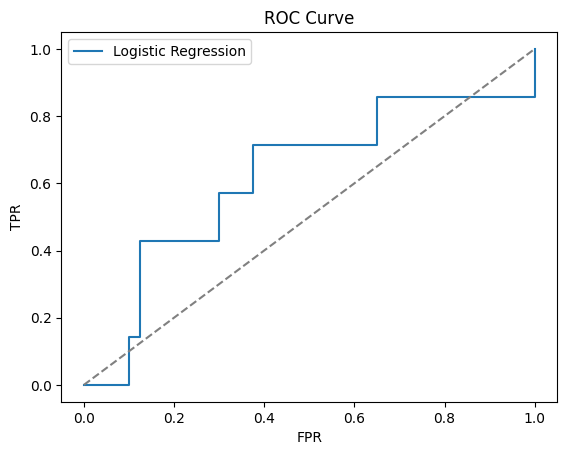

AUC Score: 0.6178571428571429


In [681]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_prob))


In [682]:
#rank feature importance
coefficients = pd.Series(logreg.coef_[0], index=X.columns)

# Rank 
coeff_ranking = coefficients.abs().sort_values(ascending=False)

# Show top 15 

print("Feature Importance nWith Direction (+/-):")
print(coefficients.loc[coeff_ranking.index[:15]])


Feature Importance nWith Direction (+/-):
DGN_DGN5              1.269670
FEV1_low_bin          1.002215
Weakness_bin          0.774472
T2DM_bin              0.706477
Tumor_rank            0.655205
DGN_DGN6             -0.653158
Dyspnoea_bin          0.598163
FVC_bin_(2.0, 4.0]    0.439312
AGE_binary            0.415365
DGN_DGN3             -0.390872
symptom_count         0.389032
DGN_DGN2              0.280899
comorbid_count        0.204488
Zubrod_rank           0.203516
FVC_bin_(0.0, 2.0]   -0.170144
dtype: float64


In [683]:
#Some binned one-hot encoded columns are misbehaving 
X.columns = X.columns.str.replace(r"[\[\]<>,.0 (;]", "_", regex=True)


X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pain_bin                  470 non-null    int64  
 1   Haemoptysis_bin           470 non-null    int64  
 2   Dyspnoea_bin              470 non-null    int64  
 3   Cough_bin                 470 non-null    int64  
 4   Weakness_bin              470 non-null    int64  
 5   T2DM_bin                  470 non-null    int64  
 6   MI_bin                    470 non-null    int64  
 7   PAD_bin                   470 non-null    int64  
 8   Smoking_bin               470 non-null    int64  
 9   Asthma_bin                470 non-null    int64  
 10  FEV1_low_bin              470 non-null    int32  
 11  AGE_binary                470 non-null    int32  
 12  FVC_bin_______2___        470 non-null    uint8  
 13  FVC_bin__2____4___        470 non-null    uint8  
 14  FVC_bin__4

In [684]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt


# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=42
)

pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=pos_weight,  
    enable_categorical=True, 
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    random_state=30
)


xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=30, ...)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        40
           1       0.27      0.43      0.33         7

    accuracy                           0.74        47
   macro avg       0.58      0.61      0.59        47
weighted avg       0.80      0.74      0.77        47

AUC Score: 0.4857142857142857


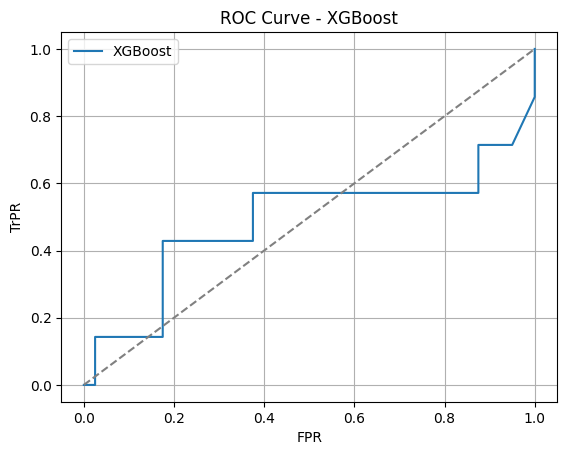

In [685]:
y_prob = xgb.predict_proba(X_test)[:, 1]
y_pred = xgb.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TrPR')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.show()


In [686]:
#optimize XGBOOST - removing one-hot encoding

df_old = df
df = df_restore 



In [697]:
#Restored data set needs category type columns
categorical_cols = ['DGN'] #, 'Zubrod_perf_cat', 'Tumor_cat']

for col in categorical_cols:
    df[col] = df[col].astype('category')
    

columns_to_drop = [
    'mortality_label',
 #   'Dyspnoea_bin',
   # 'Pain_bin',
    #'T2DM_bin',
    #'MI_bin',	
    #'PAD_bin',
    #'Smoking_bin',	
    #'Asthma_bin',
    #'Haemoptysis_bin'
]
X = df.drop(columns=columns_to_drop)
y = df['mortality_label']

X.columns = X.columns.str.replace(r"[\[\]<>,.0 (;]", "_", regex=True)

df.to_csv('thoracic_data.csv', index=False)

print("After dropped columns:")
X.head()

After dropped columns:


,DGN,Pain_bin,Haemoptysis_bin,Dyspnoea_bin,Cough_bin,Weakness_bin,T2DM_bin,MI_bin,PAD_bin,Smoking_bin,...,FEV1_low_bin,AGE_binary,FVC_bin_______2___,FVC_bin__2____4___,FVC_bin__4____6___,Tumor_rank,Zubrod_rank,symptom_count,comorbid_count,age_weakness_interaction
0,DGN2,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,3,1,1,0,12.0
1,DGN3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0.0
2,DGN3,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0.0
3,DGN3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
4,DGN3,0,1,0,1,1,0,0,0,0,...,1,0,0,1,0,0,2,2,0,15.0


In [688]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer

num_positive = (y == 0).sum()
num_negative =(y == 1).sum()
scale_pos_weight = num_negative / num_positive

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    enable_categorical=True, 
    use_lable_encoder=False,
    scale_pos_weight=scale_pos_weight, 
    random_state=42,
    verbosity=0
)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 3, 5, 7] 
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc = make_scorer(roc_auc_score, needs_proba=True)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='roc_auc', 
    cv=cv,
    n_iter=30,
    verbose=1,
    random_state=42,
    n_jobs=1
)

search.fit(X, y)

print("Best AUC:", search.best_score_)
print("Best Parameters:", search.best_params_)

best_xgb = search.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best AUC: 0.6724107142857143
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}


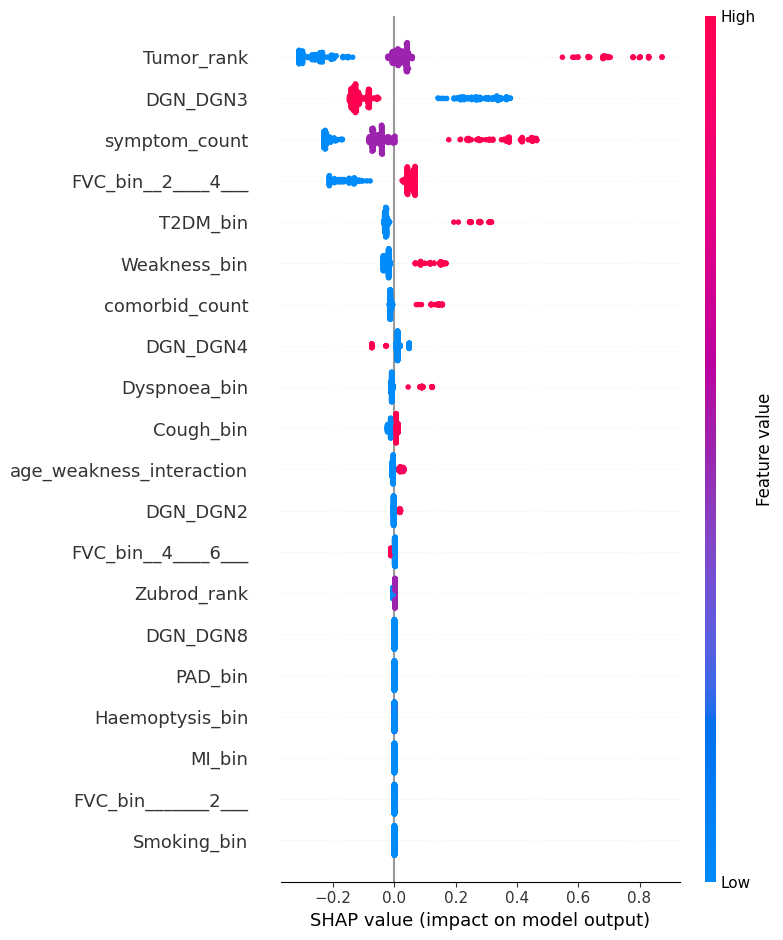

In [689]:
#Need help discovering optimal numeric features:
import shap

# Convert to num / remove categorical dtype
X_numeric = X.copy()
X_numeric = pd.get_dummies(X_numeric, drop_first=True)  # Or label encode if needed

# Re-run model fit 
best_xgb.fit(X_numeric, y)

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_numeric)

shap.summary_plot(shap_values, X_numeric)

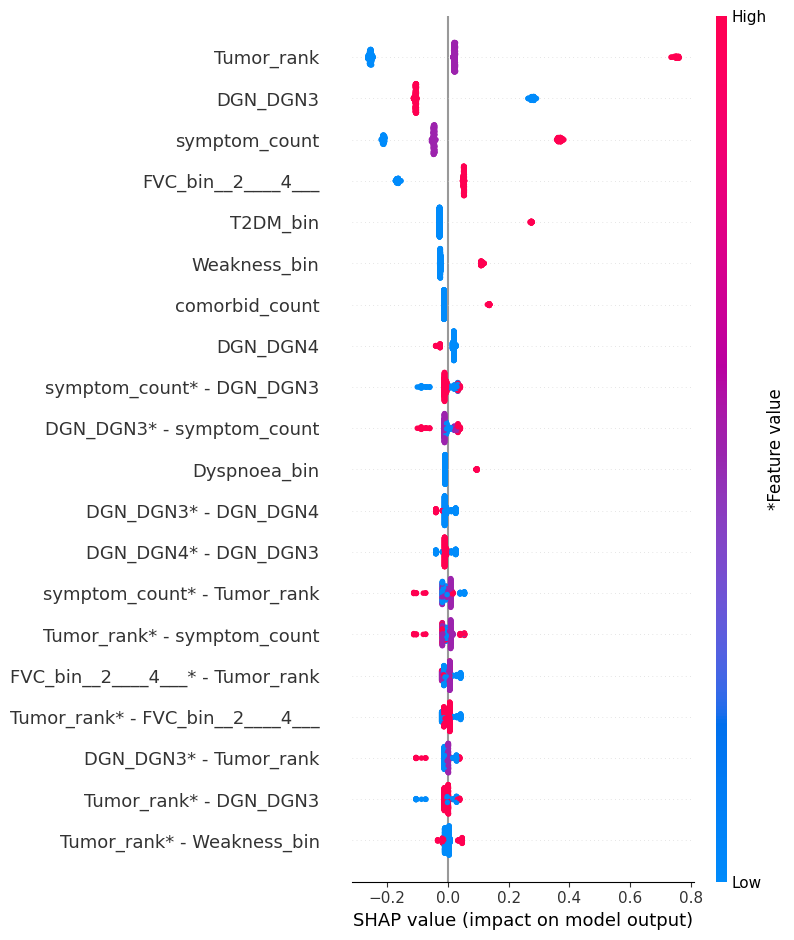

In [690]:
#looking for interactions

explainer = shap.TreeExplainer(best_xgb)
shap_interaction_values = explainer.shap_interaction_values(X_numeric)

shap.summary_plot(shap_interaction_values, X_numeric, plot_type="compact_dot")

In [691]:
print(y.value_counts()) #400 / 70 in Thoracic set

0    400
1     70
Name: mortality_label, dtype: int64


AUC Score: 0.8160714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85        40
           1       0.33      0.57      0.42         7

    accuracy                           0.77        47
   macro avg       0.62      0.69      0.64        47
weighted avg       0.83      0.77      0.79        47



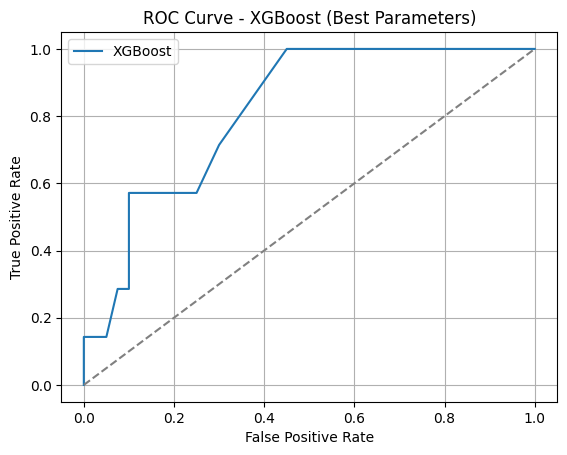

In [692]:
#New XGB

#Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}
#After engineering new features I've introduced collinearity that can lead to overfitting - dropping old features
columns_to_drop = [
    'mortality_label',
   # 'AGE',
    'Asthma_bin',
    'Zubrod_rank',
    'Smoking_bin',
    'PAD_bin',
    'MI_bin',
    'Dyspnoea_bin',
    'Haemoptysis_bin',
    'Pain_bin',
    'age_weakness_interaction',
    'Cough_bin'
]

X = df.drop(columns=columns_to_drop)
y = df['mortality_label']

X.columns = X.columns.str.replace(r"[\[\]<>,.0 (;]", "_", regex=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=30
)

#scale for imbalanced set
scale_pos_weight = 400 / 70 

# Using best parameters from above
xgb_best = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    enable_categorical=True,
    learning_rate=0.01,
    n_estimators=300,
    max_depth=3,
    min_child_weight=5,
    gamma=1,
    subsample=1.0,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=30,
    verbosity=1
)

# Train
xgb_best.fit(X_train, y_train)

# Predict
y_prob = xgb_best.predict_proba(X_test)[:, 1]
y_pred = xgb_best.predict(X_test)

# Metrics
print("AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Best Parameters)')
plt.legend()
plt.grid(True)
plt.show()



In [718]:
#Often in healthcare we modify the thresshold to maximize sensitivity at the expense of overall accuracy / FP's 
#For example, if the intervention is "End of Life Counseling" it's worth giving it to an extra X people to avoid missing Y persons

threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Compute 
tpr = tp / (tp + fn) if (tp + fn) else 0
fpr = fp / (fp + tn) if (fp + tn) else 0
auc = roc_auc_score(y_test, y_prob)

print(f"Threshold: {threshold}")
print(f"AUC Score: {auc:.3f}")
print(f"True Positive Rate (TPR / Sensitivity): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"Specificity (TNR): {tn / (tn + fp):.2f}")

Threshold: 0.4
AUC Score: 0.816
True Positive Rate (TPR / Sensitivity): 1.00
False Positive Rate (FPR): 0.47
Specificity (TNR): 0.53


               feature  importance_mean  importance_std
0                  DGN         0.113393        0.036842
8           Tumor_rank         0.096964        0.042619
9        symptom_count         0.034643        0.055220
1         Weakness_bin         0.000536        0.015362
3         FEV1_low_bin         0.000000        0.000000
4           AGE_binary         0.000000        0.000000
10      comorbid_count        -0.001071        0.005987
5   FVC_bin_______2___        -0.001250        0.002772
6   FVC_bin__2____4___        -0.005714        0.015787
7   FVC_bin__4____6___        -0.006607        0.005419
2             T2DM_bin        -0.008214        0.012273


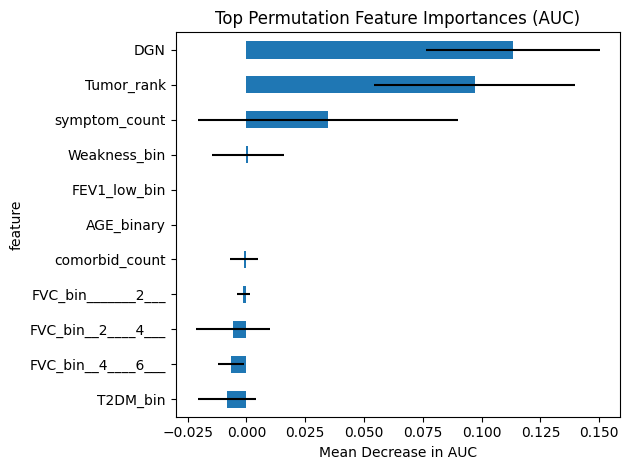

In [719]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Run permutation importance
result = permutation_importance(
    xgb_best,
    X_test,
    y_test,
    n_repeats=10,
    random_state=30,
    scoring='roc_auc'
)

# Convert to DataFrame
perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# Print top features
print(perm_df.head(15))

# Plot top features
perm_df.head(15).plot.barh(x='feature', y='importance_mean', xerr='importance_std', legend=False)
plt.title('Top Permutation Feature Importances (AUC)')
plt.xlabel('Mean Decrease in AUC')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


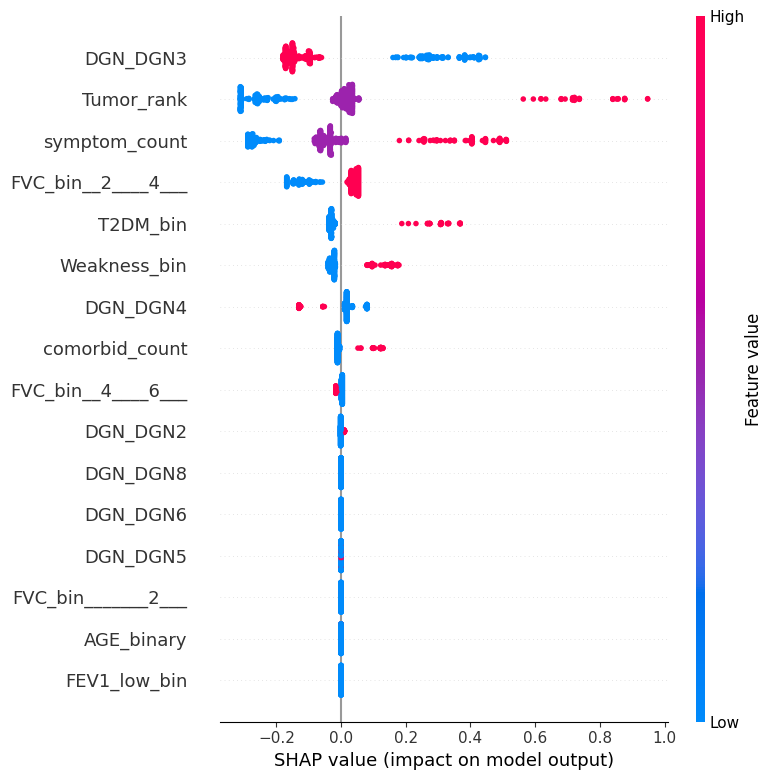

Mean absolute SHAP values (feature importance):
               feature  mean_abs_shap
11            DGN_DGN3       0.186986
7           Tumor_rank       0.168946
8        symptom_count       0.166087
5   FVC_bin__2____4___       0.062981
1             T2DM_bin       0.051188
0         Weakness_bin       0.045012
12            DGN_DGN4       0.034878
9       comorbid_count       0.018349
6   FVC_bin__4____6___       0.004246
10            DGN_DGN2       0.001861
2         FEV1_low_bin       0.000000
3           AGE_binary       0.000000
4   FVC_bin_______2___       0.000000
13            DGN_DGN5       0.000000
14            DGN_DGN6       0.000000
15            DGN_DGN8       0.000000

Most important features by SHAP values:
1. DGN_DGN3
2. Tumor_rank
3. symptom_count
4. FVC_bin__2____4___
5. T2DM_bin
6. Weakness_bin
7. DGN_DGN4
8. comorbid_count
9. FVC_bin__4____6___
10. DGN_DGN2
11. FEV1_low_bin
12. AGE_binary
13. FVC_bin_______2___
14. DGN_DGN5
15. DGN_DGN6
16. DGN_DGN8


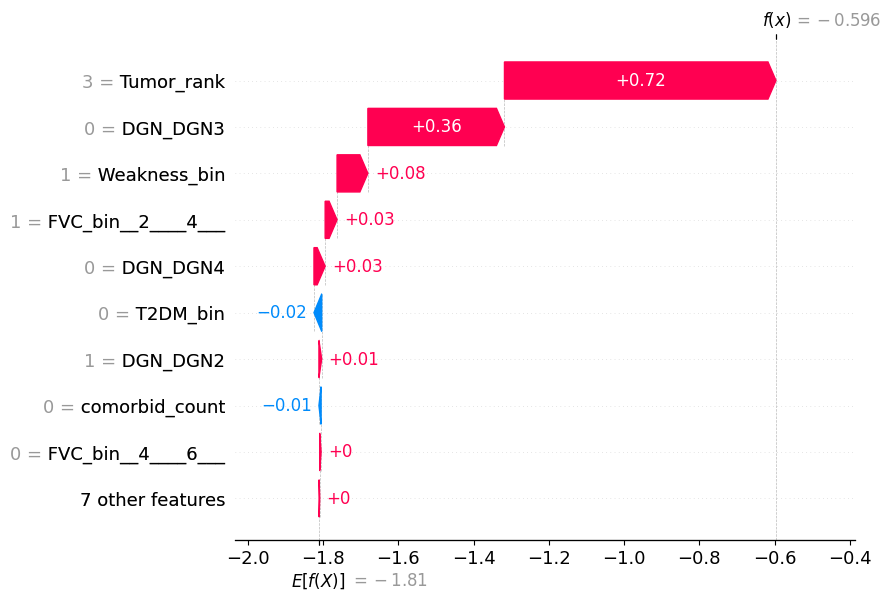

In [693]:
#Need help discovering optimal numeric features - using SHAP
import shap

X_numeric = X.copy()
X_numeric = pd.get_dummies(X_numeric, drop_first=True)

best_xgb.fit(X_numeric, y)

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_numeric)

shap.summary_plot(shap_values, X_numeric)

mean_abs_shap = pd.DataFrame({
    'feature': X_numeric.columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

print("Mean absolute SHAP values (feature importance):")
print(mean_abs_shap)

shap_list = mean_abs_shap['feature'].tolist()
print("\nMost important features by SHAP values:")
for i, feat in enumerate(shap_list, 1):
    print(f"{i}. {feat}")

explainer = shap.Explainer(best_xgb, X_numeric)
shap_expl = explainer(X_numeric.iloc[0:1])

shap.plots.waterfall(shap_expl[0])

# CONCLUSION: most signal is coming from the fact that advanced tumors have low survival. Certain diagnoses types (DGN3 and symptoms (weakness)
# stand out as influential in survival. T2DM correlation with survival is paradoxical and may suggest impaired disease progression with 
# impaired immunity common with T2DM. Feature engineering had a major impact on bringing the model to optimal performance.

In [704]:
import joblib 

joblib.dump(xgb_best, 'xgb_model.pkl')
joblib.dump(X_train.columns.tolist(), 'xgb_columns.pkl')
joblib.dump(categorical_cols, 'xgb_categorical_cols.pkl')


['xgb_categorical_cols.pkl']

In [708]:
# Load model
model = joblib.load('xgb_model.pkl')
X_new = pd.read_csv('thoracic_data.csv')

expected_cols = joblib.load('xgb_columns.pkl')
categorical_cols = joblib.load('xgb_categorical_cols.pkl')

for col in categorical_cols:
    if col in X_new.columns:
        X_new[col] = pd.Categorical(X_new[col])

X_new = X_new.reindex(columns=expected_cols)

pred = model.predict(X_new)
prob = model.predict_proba(X_new)[:, 1]

In [714]:
X_new['predicted_label'] = pred
X_new['predicted_prob'] = prob

# Show header
print(X_new.head())

# Save to CSV
X_new.to_csv('thoracic_predictions.csv', index=False)

threshold = 0.6
count_above_threshold = (X_new['predicted_prob'] > threshold).sum()
print(f"Count of predicted probabilities above {threshold}: {count_above_threshold}")

    DGN  Weakness_bin  T2DM_bin  FEV1_low_bin  AGE_binary  FVC_bin_______2___  \
0  DGN2             1         0             0           0                   0   
1  DGN3             0         0             0           0                   0   
2  DGN3             0         0             0           0                   0   
3  DGN3             0         0             0           0                   0   
4  DGN3             1         0             1           0                   0   

   FVC_bin__2____4___  FVC_bin__4____6___  Tumor_rank  symptom_count  \
0                   0                   0           3              1   
1                   0                   0           1              0   
2                   0                   0           0              1   
3                   0                   0           0              0   
4                   0                   0           0              2   

   comorbid_count  predicted_label  predicted_prob  
0               0          